# SMD Results

- Visualization of forecasts, reconstructions, anomaly scores, predicted and actual anomalies

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import os
import pickle
import json
from sklearn.metrics import f1_score, precision_score, recall_score


-- Done
Avg precision: 0.8491
Avg recalls: 0.9397
Avg f1s: 0.8802


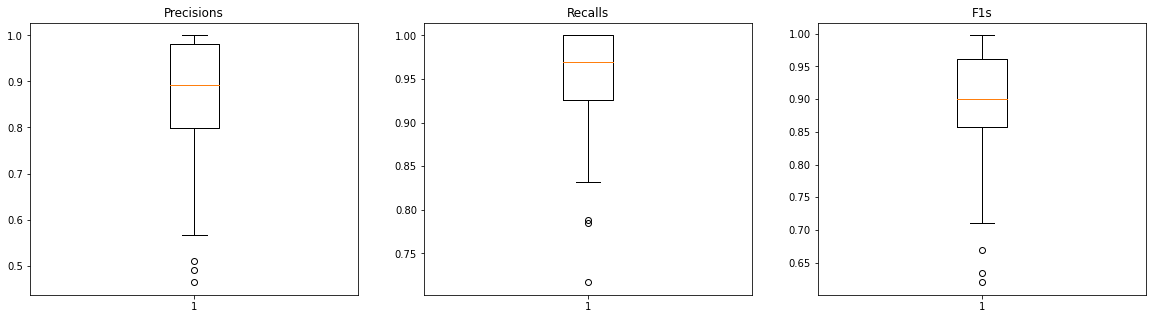

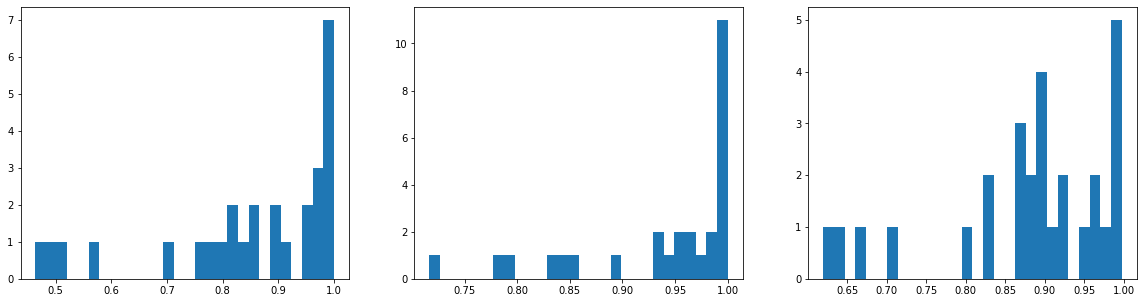

In [93]:
# Aggregate results for all subparts of dataset 
result_dir = '../output/smd'
precisions = []
recalls = []
f1s = []

for folder in os.listdir(result_dir):
    path = f'{result_dir}/{folder}/summary.txt'
    if not os.path.exists(path):
        print(f'Folder {folder} does not has a summary.txt file')
        continue
    with open(path) as f:
        result_dict = json.load(f)['pot_result']
        if result_dict['f1'] < 0.3:
            print(path)
        precisions.append(result_dict['precision'])
        recalls.append(result_dict['recall'])
        f1s.append(result_dict['f1'])
print('-- Done')

precisions = np.array(precisions)
recalls = np.array(recalls)
f1s = np.array(f1s)

print(f'Avg precision: {precisions.mean():.4f}')
print(f'Avg recall: {recalls.mean():.4f}')
print(f'Avg f1: {f1s.mean():.4f}')

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].set_title('Precisions')
axs[0].boxplot(precisions);
axs[1].set_title('Recalls')
axs[1].boxplot(recalls);
axs[2].set_title('F1s')
axs[2].boxplot(f1s);
plt.show();

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].hist(precisions, bins=len(precisions));
axs[1].hist(recalls, bins=len(recalls));
axs[2].hist(f1s, bins=len(f1s));
plt.show();

In [2]:
output_path = '../output/smd/1-1'

In [3]:
pot = pd.read_pickle(f'{output_path}/anomaly_preds.pkl')
pot.head()

,a_score,threshold,pred_anomaly,anomaly
0,0.020553,0.082884,0,0.0
1,0.016261,0.082884,0,0.0
2,0.016405,0.082884,0,0.0
3,0.022641,0.082884,0,0.0
4,0.020146,0.082884,0,0.0


KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

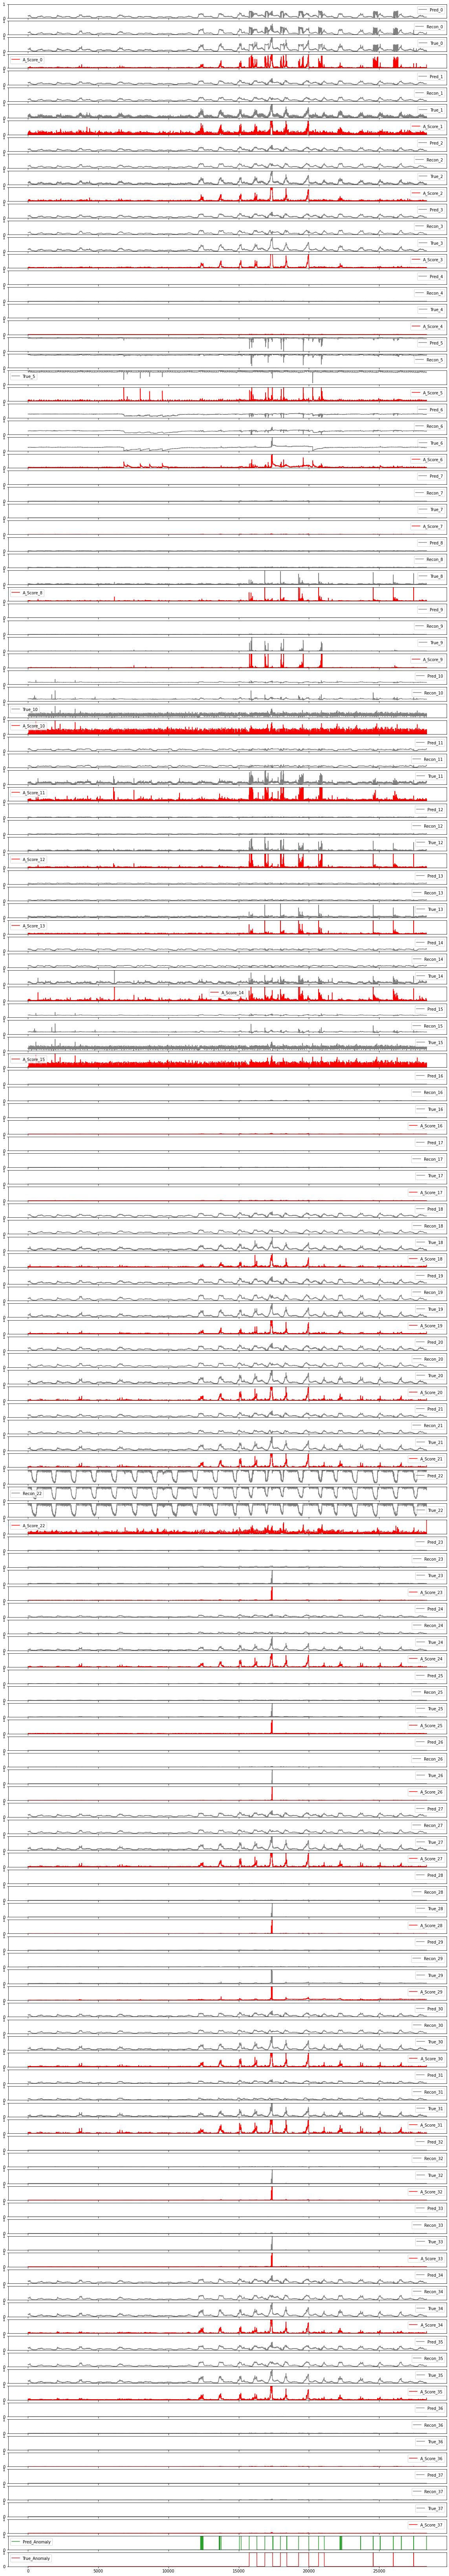

In [4]:
output = pd.read_pickle(f'{output_path}/preds.pkl')
output['Pred_Anomaly'] = pot['pred_anomaly']
output['True_Anomaly'] = pot['anomaly']

plt.tight_layout()
colors = ['gray', 'gray', 'gray', 'r']*(output.shape[1] // 4)
output.plot(subplots=True, figsize=(20,120), style=colors, ylim=(0,1))
plt.show();

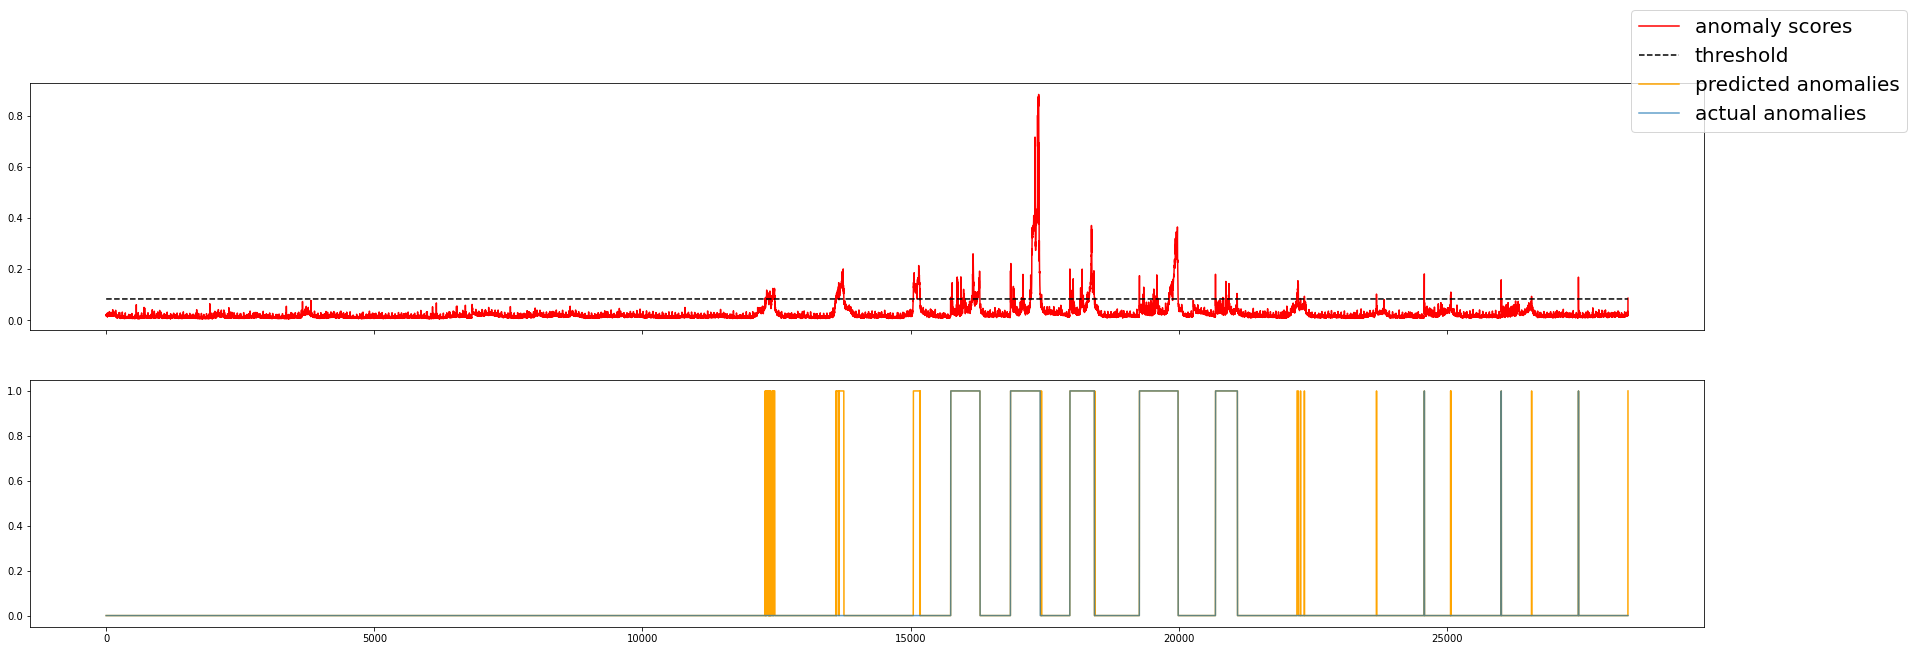

In [6]:
fig, axs = plt.subplots(2, figsize=(30, 10), sharex=True)
axs[0].plot(pot['a_score'], c='r', label='anomaly scores')
axs[0].plot(pot['threshold'], linestyle='dashed', c='black', label='threshold')
axs[1].plot(pot['pred_anomaly'], label='predicted anomalies', c='orange')
axs[1].plot(pot['anomaly'], label='actual anomalies', alpha=0.7, )

fig.legend(prop={'size': 20})
plt.show()

In [7]:
print('precision: ', precision_score(pot['anomaly'], pot['pred_anomaly']))
print('recall:    ', recall_score(pot['anomaly'], pot['pred_anomaly']))
print('f1 score:  ', f1_score(pot['anomaly'], pot['pred_anomaly']))

precision:  0.8645699614890886
recall:     1.0
f1 score:   0.9273666092943201


In [11]:
output.head()

,Pred_0,Recon_0,True_0,A_Score_0,Pred_1,Recon_1,True_1,A_Score_1,Pred_2,Recon_2,...,Pred_36,Recon_36,True_36,A_Score_36,Pred_37,Recon_37,True_37,A_Score_37,Pred_Anomaly,True_Anomaly
0,0.023385,0.044677,0.010753,0.046556,0.029192,0.035102,0.008475,0.047344,0.024167,0.030008,...,0.000039,0.001637,0.0,0.001676,-1.105508e-07,0.000859,0.0,0.000859,-1,0
1,0.022224,0.036172,0.021505,0.015386,0.028317,0.030593,0.080508,0.102106,0.023151,0.028540,...,0.000042,-0.001129,0.0,0.001171,-1.300883e-07,0.000669,0.0,0.000669,-1,0
2,0.023167,0.019839,0.021505,0.003328,0.028975,0.031410,0.074153,0.087921,0.023914,0.029693,...,0.000039,-0.000174,0.0,0.000213,-1.132304e-07,0.001722,0.0,0.001722,-1,0
3,0.023371,0.029496,0.021505,0.009857,0.029214,0.029646,0.048729,0.038598,0.024196,0.029024,...,0.000039,-0.001196,0.0,0.001234,-1.097034e-07,0.001564,0.0,0.001564,-1,0
4,0.025514,0.029503,0.021505,0.012007,0.030426,0.029319,0.044492,0.029239,0.025580,0.028628,...,0.000030,-0.000625,0.0,0.000656,-1.086899e-07,0.000844,0.0,0.000844,-1,0


<Figure size 432x288 with 0 Axes>

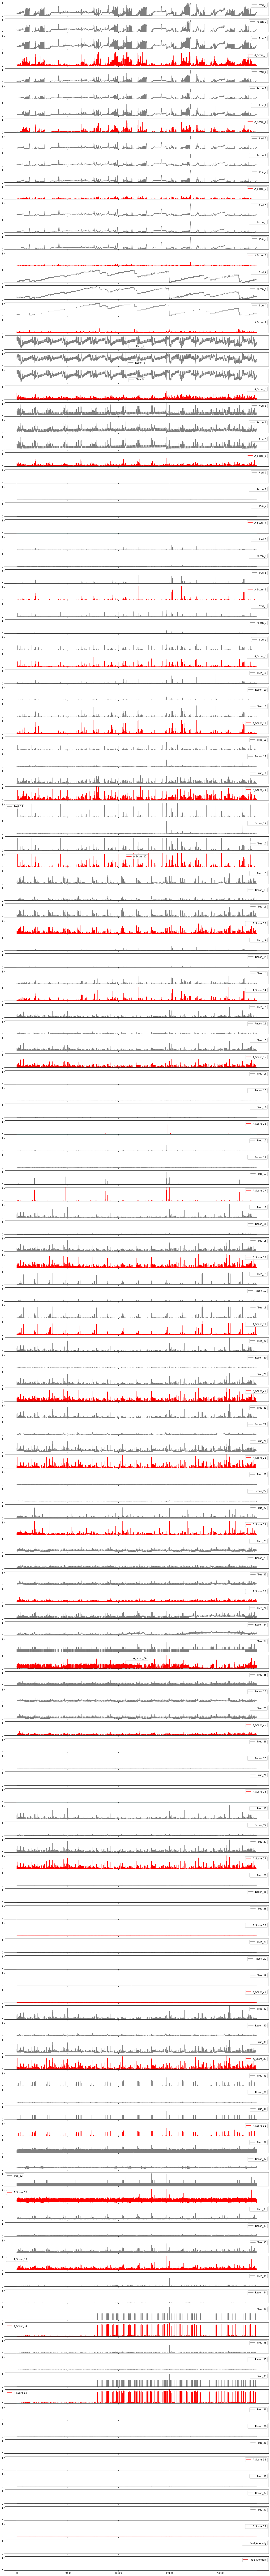

In [187]:
plt.tight_layout()
colors = ['gray', 'gray', 'gray', 'r']*(output.shape[1] // 4)
output.plot(subplots=True, figsize=(20,200), ylim=(0,1.1), style=colors)
plt.show();

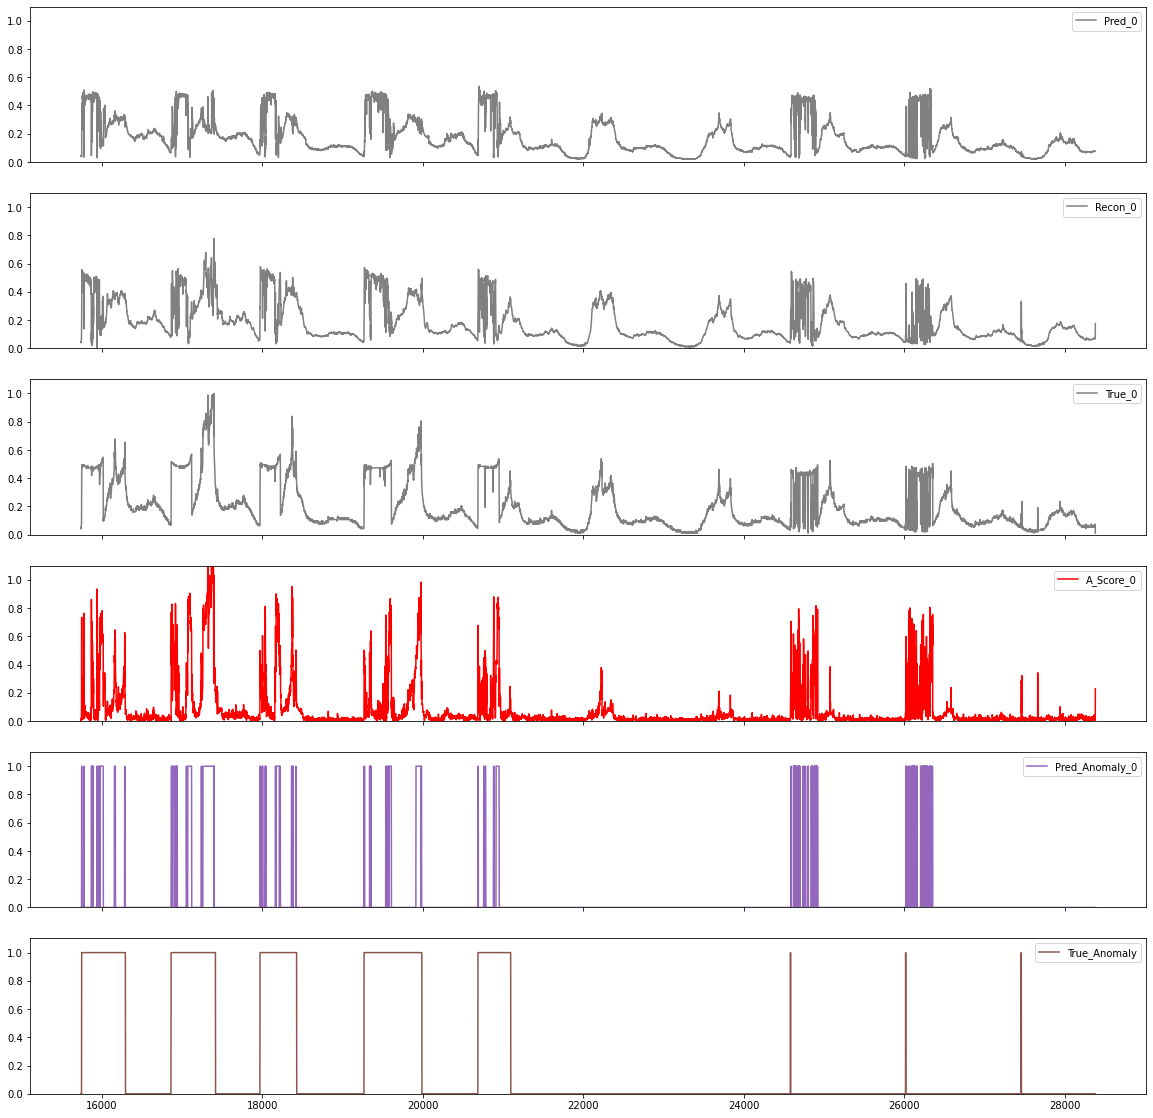

In [9]:
i = 0

# Calculate threshold loss = mean + 3std
rses = output.loc[:, f'A_Score_{i}']
thresh = np.mean(rses) + 3*np.std(rses)

output[f'Pred_Anomaly_{i}'] = (rses > thresh).astype(int)

start, end = 15849, 16368
df = output.loc[start-110:, [f'Pred_{i}', f'Recon_{i}', f'True_{i}', f'A_Score_{i}', f'Pred_Anomaly_{i}','True_Anomaly']]
df.plot(subplots=True, figsize=(20, 20), ylim=(0,1.1), style=['gray', 'gray', 'gray', 'r'])
plt.show()

In [10]:
print(precision_score(output['True_Anomaly'], output[f'Pred_Anomaly_{i}']))
print(recall_score(output['True_Anomaly'], output[f'Pred_Anomaly_{i}']))
print(f1_score(output['True_Anomaly'], output[f'Pred_Anomaly_{i}']))

0.7873485868102288
0.21714922048997773
0.3404131510037824


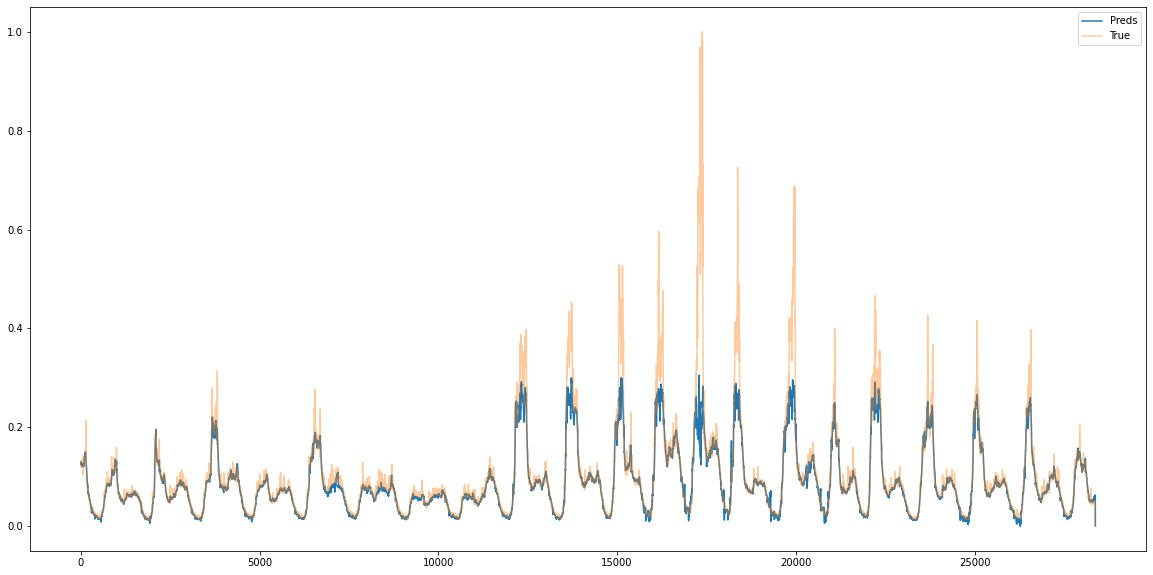

In [296]:
i = 30
# Plot
plt.figure(figsize=(20, 10))
recon = output.loc[:, [f'Recon_{i}']]
true_y = output.loc[:, [f'True_{i}']]

plt.plot(recon.values, label='Preds')
plt.plot(true_y.values, label='True', alpha=0.4)

plt.legend()

In [297]:
# Compute anomaly for every feature
for i in range(38):
    rses = output.loc[:, f'A_Score_{i}']
    thresh = np.mean(rses) + 15*np.std(rses)
    
    output[f'Pred_Anomaly_{i}'] = (rses > thresh).astype(int)

anomaly_preds = output.loc[:, [f'Pred_Anomaly_{i}' for i in range(38)]]
print(anomaly_preds.shape)

output['Pred_Anomaly_Global'] = (np.sum(anomaly_preds, 1) > 1).astype(int)
output.head()

(28379, 38)


,Pred_0,Recon_0,True_0,A_Score_0,Pred_1,Recon_1,True_1,A_Score_1,Pred_2,Recon_2,...,Pred_Anomaly_29,Pred_Anomaly_30,Pred_Anomaly_31,Pred_Anomaly_32,Pred_Anomaly_33,Pred_Anomaly_34,Pred_Anomaly_35,Pred_Anomaly_36,Pred_Anomaly_37,Pred_Anomaly_Global
0,0.141692,0.149757,0.150538,0.009627,0.120846,0.132502,0.153602,0.053855,0.131449,0.128453,...,0,0,0,0,0,0,0,0,0,0
1,0.147164,0.156881,0.161290,0.018535,0.104490,0.137837,0.159958,0.077589,0.128281,0.139390,...,0,0,0,0,0,0,0,0,0,0
2,0.154090,0.156164,0.161290,0.012326,0.113643,0.141576,0.150424,0.045630,0.129484,0.140963,...,0,0,0,0,0,0,0,0,0,0
3,0.149776,0.154873,0.161290,0.017931,0.120297,0.143679,0.115466,0.033044,0.131655,0.144020,...,0,0,0,0,0,0,0,0,0,0
4,0.149155,0.158169,0.161290,0.015257,0.108804,0.140832,0.137712,0.032027,0.120996,0.141898,...,0,0,0,0,0,0,0,0,0,0


In [298]:
print(precision_score(output['True_Anomaly'], output['Pred_Anomaly_Global']))
print(recall_score(output['True_Anomaly'], output['Pred_Anomaly_Global']))
print(f1_score(output['True_Anomaly'], output['Pred_Anomaly_Global']))

0.890625
0.021158129175946547
0.04133430021754895


 ## Evaluation strategy
In [MTAD-GAT paper](https://arxiv.org/pdf/2009.02040.pdf) they follow the evaluation strategy that has become a common evaluation strategy for anomaly detection, for instance [[1] Time-Series Anomaly Detection Service at Microsof](https://arxiv.org/pdf/1906.03821.pdf) and [[2] Unsupervised Anomaly
Detection via Variational Auto-Encoder for Seasonal KPIs in Web Applications](https://arxiv.org/pdf/1802.03903.pdf)

**Strategy**: If any point in an anomaly segment can be detected by the algorithm, and the delay of this point is no more than *k* from the start point of the anomaly segment, we say this segment is detected correctly. Thus, all points in this segment are treated as correct, and the points outside the anomaly segments are treated as normal.

*k* will vary depending on the granularity of the data, and should follow the requirements of real applications. [1] set k = 7 for minutely time-series, k = 3 for hourly time-series and k = 1 for daily time-series. Some people instead set k so that as long as any point within the anomaly segment is classified as an anomaly, the whole segment will be labeled correctly, and instead also outputs the delay.

In [11]:
# Code from Time-Series Anomaly Detection Service at Microsof: https://arxiv.org/pdf/1906.03821.pdf


# Consider delay threshold and missing segments
def get_range_proba(predict, label, delay=7, advance=0):
    # Added advance in case model predicts anomaly 'in advance' within a small window
    # Advance should be 0 or small
    
    splits = np.where(label[1:] != label[:-1])[0] + 1
    print(splits)
    is_anomaly = label[0] == 1
    new_predict = np.array(predict)
    pos = 0

    for sp in splits:
        if is_anomaly:
            if 1 in predict[(pos-advance):min(pos + delay + 1, sp)]:
                new_predict[pos: sp] = 1
            else:
                new_predict[pos: sp] = 0
        is_anomaly = not is_anomaly
        pos = sp
    sp = len(label)

    if is_anomaly:  # anomaly in the end
        if 1 in predict[(pos-advance): min(pos + delay + 1, sp)]:
            new_predict[pos: sp] = 1
        else:
            new_predict[pos: sp] = 0

    return new_predict